
Variable

Description

ID                                   : Unique Identifier of a row

Age                                  : Age of the customer

Gender                               : Gender of the customer (Male and Female)

Income                               : Yearly income of the customer

Balance                              : Average quarterly balance of the customer

Vintage                              : No. of years the customer is associated with bank

Transaction_Status                   : whether the customer has done any transaction in the past 3 months or not

Product_Holdings                     : No. of product holdings with the bank

Credit_Card                          : Whether the customer has a credit card or not

Credit_Category                      : Category of a customer based on the credit score

Is_Churn                             : Whether the customer will churn in next 6 months or not



In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats



In [87]:
data=pd.read_csv("train_PDjVQMB.csv")

In [88]:
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [89]:
def basic(data):
    print("data shape: {}".format(data.shape))
    print("....................................")
    print("data_columns : {}".format(data.columns))
basic(data)

data shape: (6650, 11)
....................................
data_columns : Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn'],
      dtype='object')


In [90]:
df=pd.DataFrame({"dtype" : data.dtypes ,"no. of unique values": data.nunique(), "no.of null values":data.isna().sum()})
df

,dtype,no. of unique values,no.of null values
ID,object,6650,0
Age,int64,52,0
Gender,object,2,0
Income,object,4,0
Balance,float64,6643,0
Vintage,int64,6,0
Transaction_Status,int64,2,0
Product_Holdings,object,3,0
Credit_Card,int64,2,0
Credit_Category,object,3,0


In [91]:
data.duplicated().sum()

0

In [92]:
data.drop('ID', axis=1, inplace=True)

In [93]:
num_cols=['Age','Balance']
cat_cols=['Gender','Transaction_Status','Income','Product_Holdings','Credit_Card','Vintage','Credit_Category','Is_Churn','credit_card_performace','high_product_holders_credit_category','old_age_transaction_status']
cat_cols1=['Gender','Income','Product_Holdings','Credit_Category']
cat_cols2=['Transaction_Status','Credit_Card','Vintage','Is_Churn','credit_card_performace','high_product_holders_credit_category']


# Feature Engineering

In [94]:
data['credit_card_performace']=0
for i,j in enumerate(data['credit_card_performace']):
    if (data['Credit_Card'][i]==1):
        if data['Credit_Category'][i]=='Poor':
            data['credit_card_performace'][i]=1
        elif data['Credit_Category'][i]=='Good':
            data['credit_card_performace'][i]=2
    

In [95]:
data['old_age_transaction_status']=0
for i,j in enumerate(data['old_age_transaction_status']):
    if (data['Age'][i]>60):
        if data['Income'][i]=='5L - 10L':
            data['old_age_transaction_status'][i]=1
        elif data['Income'][i]=='More than 15L':
            data['old_age_transaction_status'][i]=2
        
        
        


In [96]:
data['high_product_holders_credit_category']=0
for i,j in enumerate(data['high_product_holders_credit_category']):
    if (data['Product_Holdings'][i]=='3+'):
        if data['Credit_Category'][i]=='Poor':
            data['high_product_holders_credit_category'][i]=1
        elif data['Credit_Category'][i]=='Good':
            data['high_product_holders_credit_category'][i]=2

In [97]:
data['old_age_transaction_status'].value_counts()

0    6537
1      62
2      51
Name: old_age_transaction_status, dtype: int64

# EDA

In [98]:
for i in cat_cols:
    data[i]=data[i].astype("category")
    

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Age                                   6650 non-null   int64   
 1   Gender                                6650 non-null   category
 2   Income                                6650 non-null   category
 3   Balance                               6650 non-null   float64 
 4   Vintage                               6650 non-null   category
 5   Transaction_Status                    6650 non-null   category
 6   Product_Holdings                      6650 non-null   category
 7   Credit_Card                           6650 non-null   category
 8   Credit_Category                       6650 non-null   category
 9   Is_Churn                              6650 non-null   category
 10  credit_card_performace                6650 non-null   category
 11  old_

Gender
Male      0.543158
Female    0.456842
Name: Gender, dtype: float64


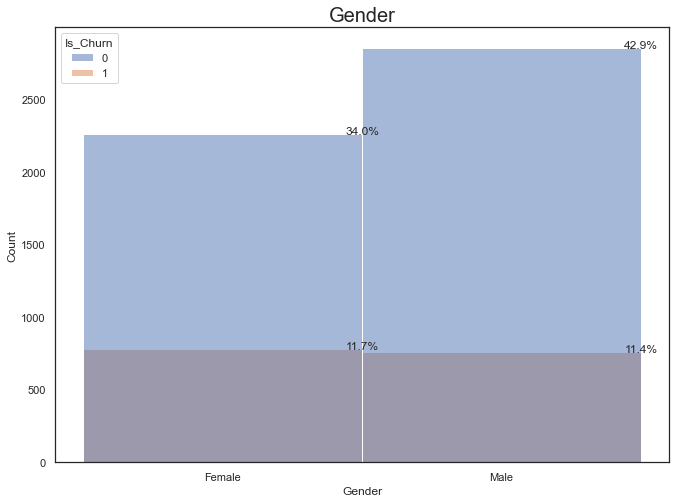

......................................

Income
10L - 15L        0.283459
5L - 10L         0.277744
Less than 5L     0.236541
More than 15L    0.202256
Name: Income, dtype: float64


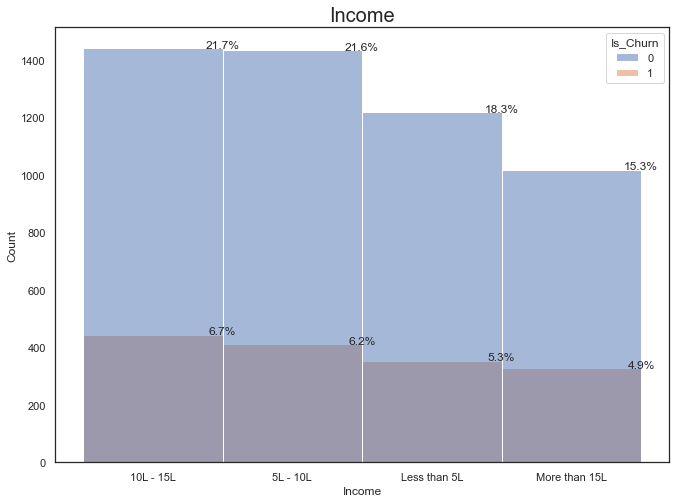

......................................

Product_Holdings
1     0.481203
2     0.478496
3+    0.040301
Name: Product_Holdings, dtype: float64


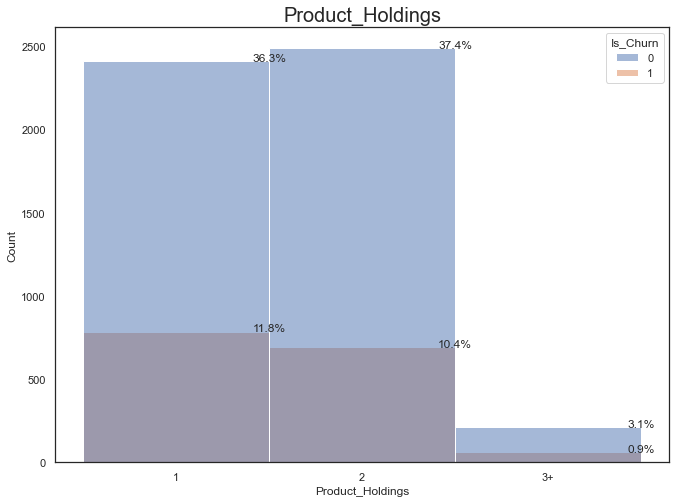

......................................

Credit_Category
Poor       0.462556
Average    0.307218
Good       0.230226
Name: Credit_Category, dtype: float64


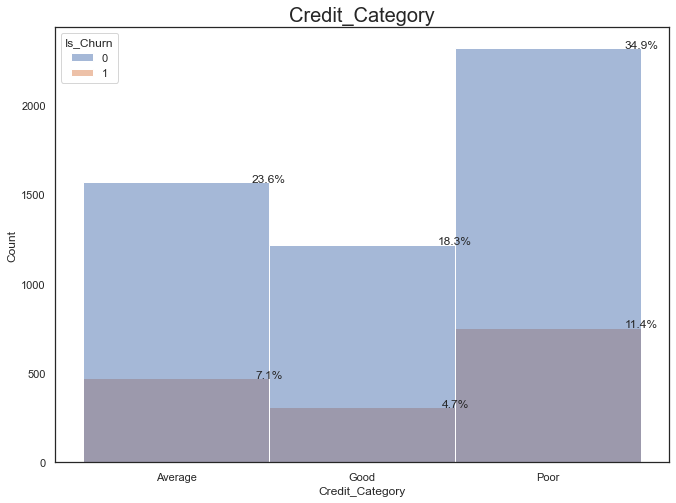

......................................



In [100]:
sns.set(style="white")
for i in cat_cols1:
    print(i)
    print(data[i].value_counts(normalize=True))
    total = float(len(data))
    plt.figure(figsize=(11,8))
    ax=sns.histplot(x=i, hue='Is_Churn',data=data)
    plt.title(i, fontsize=20)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()
    print("......................................\n")
    

In [101]:
who have 2 products and 3+ , churn rate is less

No variables match your requested type.


Transaction_Status
1    0.515789
0    0.484211
Name: Transaction_Status, dtype: float64


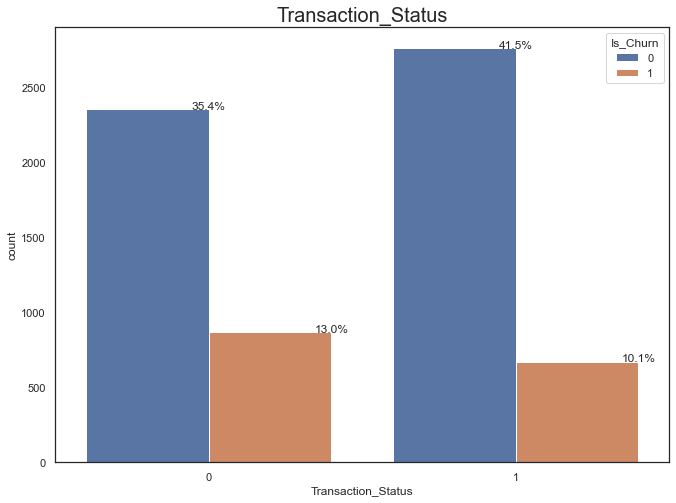

......................................

Credit_Card
1    0.664361
0    0.335639
Name: Credit_Card, dtype: float64


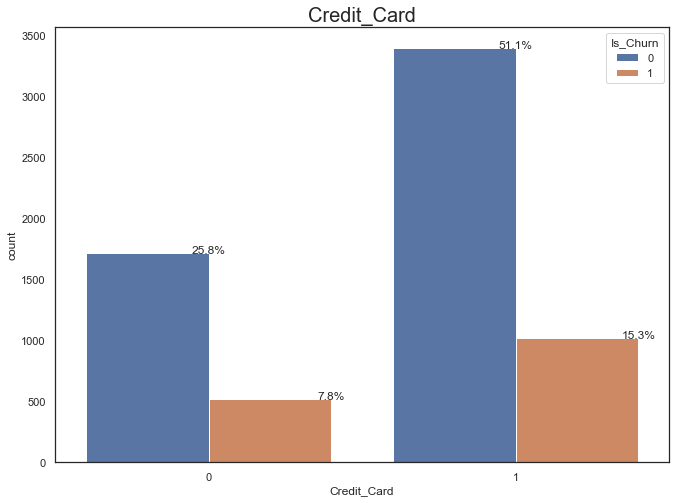

......................................

Vintage
3    0.211278
1    0.203609
2    0.199699
4    0.194887
0    0.143759
5    0.046767
Name: Vintage, dtype: float64


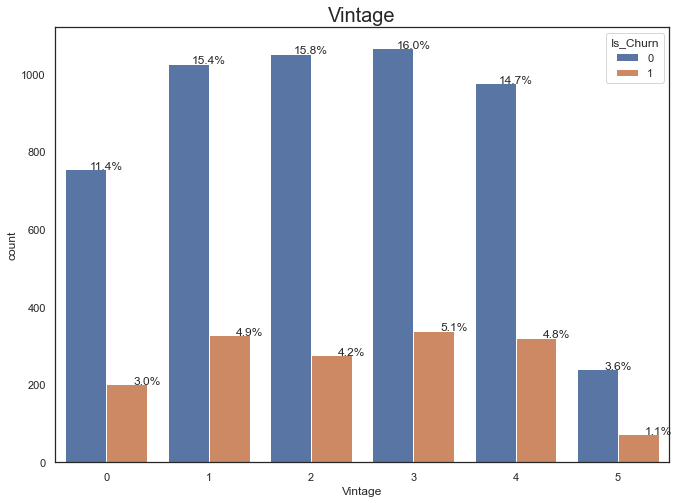

......................................

Is_Churn
0    0.768872
1    0.231128
Name: Is_Churn, dtype: float64


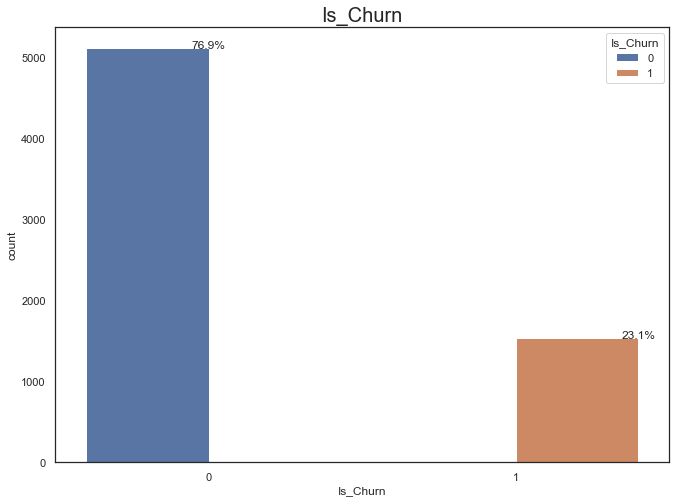

......................................

credit_card_performace
0    0.543459
1    0.304060
2    0.152481
Name: credit_card_performace, dtype: float64


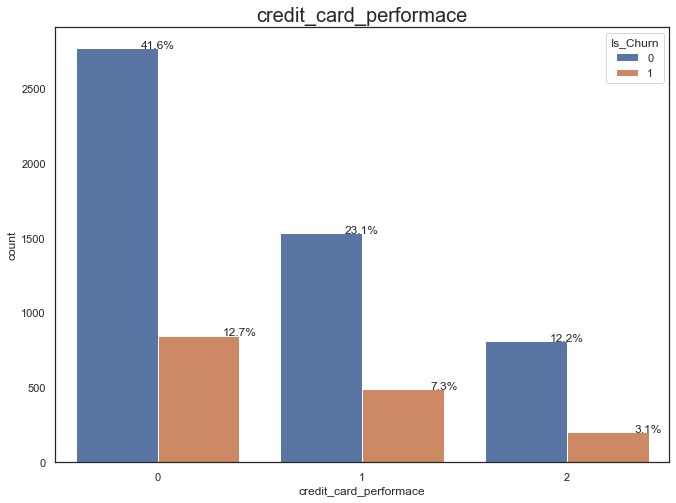

......................................

high_product_holders_credit_category
0    0.972932
1    0.017293
2    0.009774
Name: high_product_holders_credit_category, dtype: float64


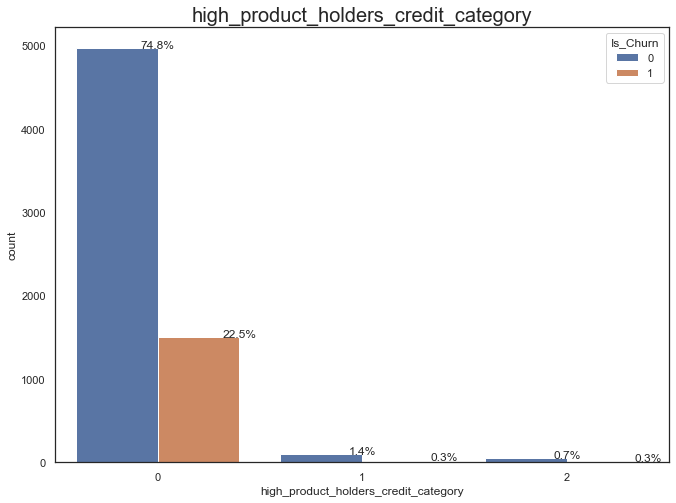

......................................



In [102]:
for i in cat_cols2:
    print(i)
    print(data[i].value_counts(normalize=True))
    total = float(len(data))
    plt.figure(figsize=(11,8))
    ax=sns.countplot(x=i, hue='Is_Churn',data=data)
    plt.title(i, fontsize=20)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()
    print("......................................\n")

In [103]:
data['high_product_holders_credit_category'].value_counts()

0    6470
1     115
2      65
Name: high_product_holders_credit_category, dtype: int64

no transaction, churn rate high

In [104]:
pd.DataFrame(data['Age'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Age,6650.0,41.130226,9.685747,21.0,34.0,40.0,47.0,72.0


          mean       std   min   25%   50%   75%   max
Age  41.130226  9.685747  21.0  34.0  40.0  47.0  72.0


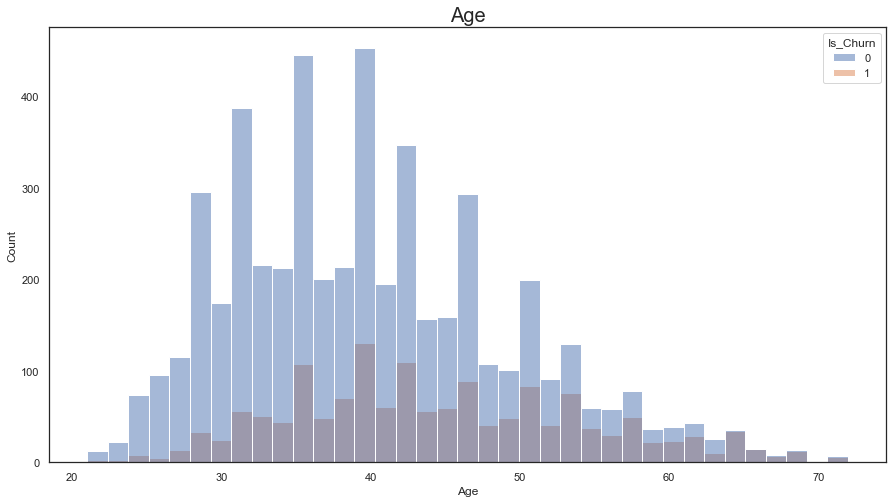

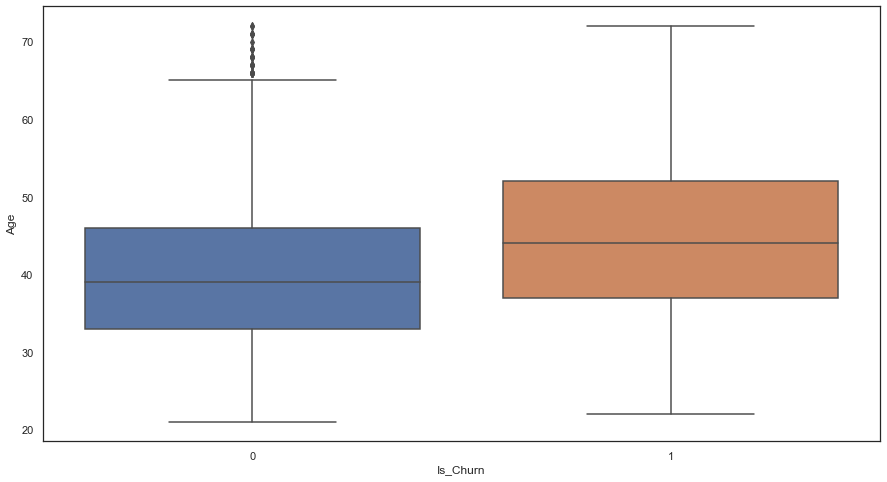

.....................................................................................................................

                  mean            std   min          25%         50%  \
Balance  804595.354985  515754.867315  63.0  392264.2125  764938.575   

                75%         max  
Balance  1147123.71  2436615.81  


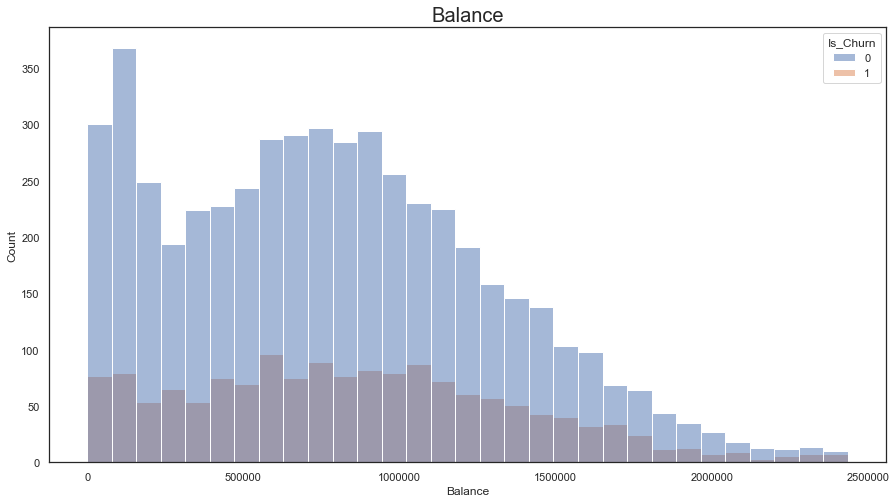

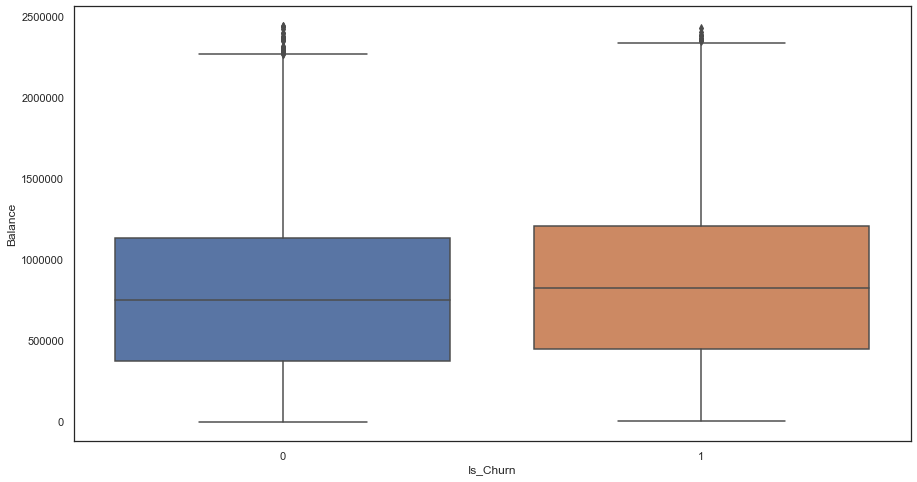

.....................................................................................................................



In [105]:
for i in num_cols:
    print(pd.DataFrame(data[i].describe()).T.drop('count',axis=1))
    plt.figure(figsize=(15,8))
    plt.title(i, fontsize=20)
    sns.histplot(x=i,hue='Is_Churn',data=data)
    plt.show()
    plt.figure(figsize=(15,8))
    sns.boxplot(x='Is_Churn',y=i,data=data)
    plt.show()
    print(".....................................................................................................................\n")

In [106]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [107]:
def plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

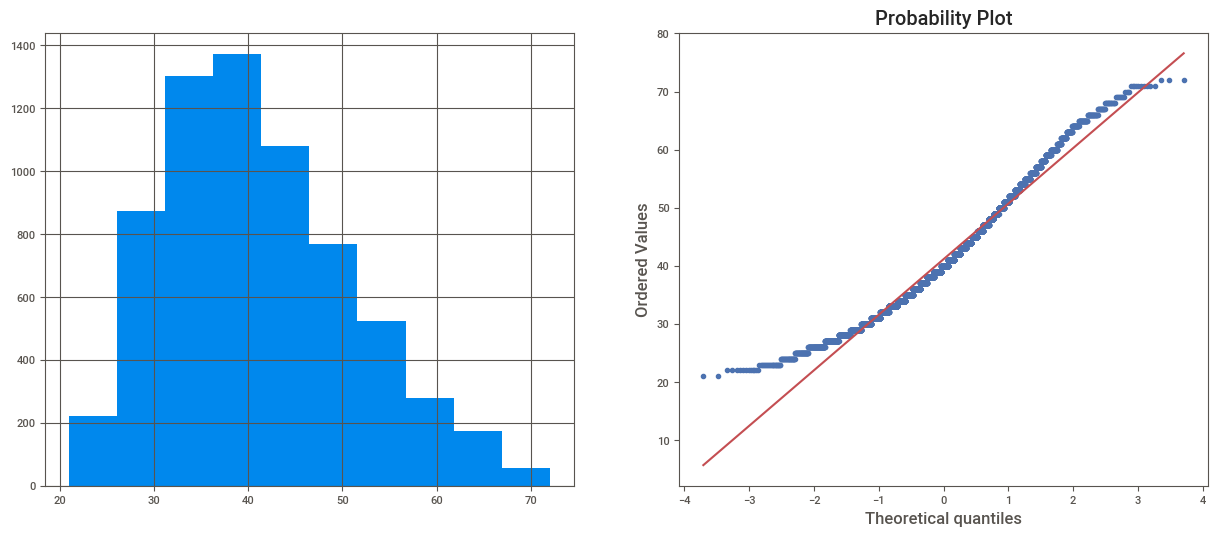

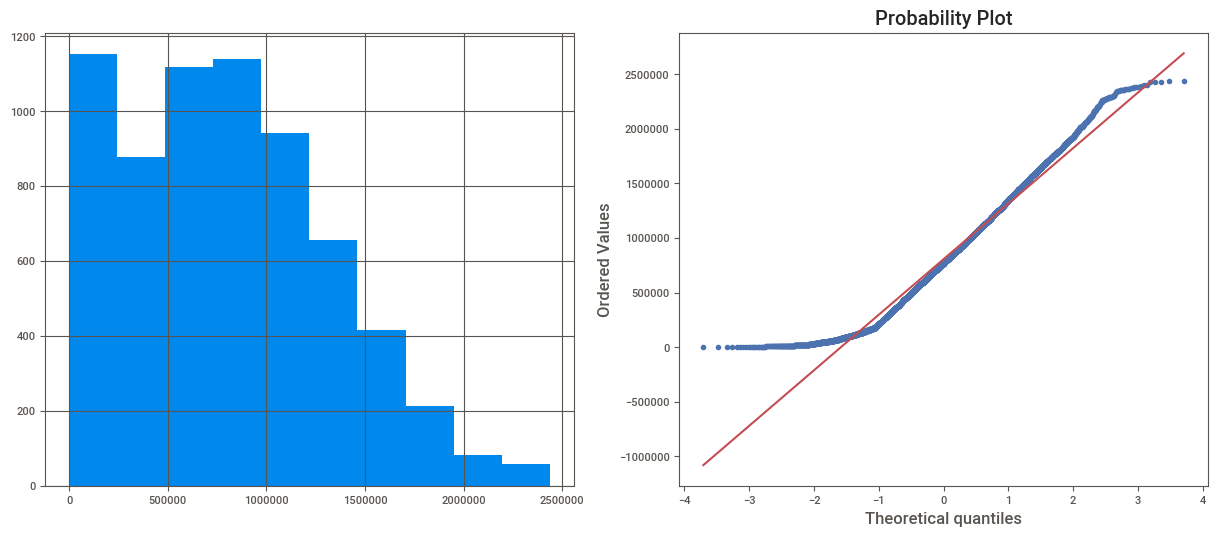

In [108]:
plots(data,'Age')
plots(data,'Balance')

# pre_processing

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn. preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action = 'ignore')

In [110]:
df=data.copy()

In [111]:
df.columns

Index(['Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category', 'Is_Churn',
       'credit_card_performace', 'old_age_transaction_status',
       'high_product_holders_credit_category'],
      dtype='object')

In [112]:
x=df.drop('Is_Churn',axis=1)
y=data['Is_Churn']

In [113]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=1,stratify=y)

In [114]:
train_y.value_counts(normalize=True),test_y.value_counts(normalize=True)

(0    0.768797
 1    0.231203
 Name: Is_Churn, dtype: float64,
 0    0.769173
 1    0.230827
 Name: Is_Churn, dtype: float64)

In [115]:
cat_cols=['Gender',
 'Transaction_Status',
 'Income',
 'Product_Holdings',
 'Credit_Card',
 'Vintage',
 'Credit_Category','credit_card_performace','high_product_holders_credit_category','old_age_transaction_status']

In [116]:
train_x= pd.get_dummies(data=train_x, columns=cat_cols,drop_first= True)
train_x.columns

Index(['Age', 'Balance', 'Gender_Male', 'Transaction_Status_1',
       'Income_5L - 10L', 'Income_Less than 5L', 'Income_More than 15L',
       'Product_Holdings_2', 'Product_Holdings_3+', 'Credit_Card_1',
       'Vintage_1', 'Vintage_2', 'Vintage_3', 'Vintage_4', 'Vintage_5',
       'Credit_Category_Good', 'Credit_Category_Poor',
       'credit_card_performace_1', 'credit_card_performace_2',
       'high_product_holders_credit_category_1',
       'high_product_holders_credit_category_2',
       'old_age_transaction_status_1', 'old_age_transaction_status_2'],
      dtype='object')

In [117]:
test_x= pd.get_dummies(data=test_x, columns=cat_cols,drop_first= True)
test_x.columns

Index(['Age', 'Balance', 'Gender_Male', 'Transaction_Status_1',
       'Income_5L - 10L', 'Income_Less than 5L', 'Income_More than 15L',
       'Product_Holdings_2', 'Product_Holdings_3+', 'Credit_Card_1',
       'Vintage_1', 'Vintage_2', 'Vintage_3', 'Vintage_4', 'Vintage_5',
       'Credit_Category_Good', 'Credit_Category_Poor',
       'credit_card_performace_1', 'credit_card_performace_2',
       'high_product_holders_credit_category_1',
       'high_product_holders_credit_category_2',
       'old_age_transaction_status_1', 'old_age_transaction_status_2'],
      dtype='object')

In [118]:
scaler=StandardScaler()
train_x_scaled=scaler.fit_transform(train_x)
test_x_scaled=scaler.transform(test_x)

# .......................................................................................................................

### tried attempts that failed

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=0)


# fit the model
clf_gini.fit(train_x_scaled, train_y)

DecisionTreeClassifier(max_depth=9, random_state=0)

In [121]:
clf_gini.score(train_x_scaled, train_y)

0.8095864661654135

In [122]:
y_pred_gini = clf_gini.predict(test_x_scaled)

In [123]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(test_y, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7496


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [125]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier(),
    "                              CatBoost": CatBoostClassifier(verbose=0)
}

for name, model in models.items():
    model.fit(train_x_scaled, train_y)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.
                              CatBoost trained.


In [126]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(test_x_scaled, test_y) * 100))

                   Logistic Regression: 76.39%
                   K-Nearest Neighbors: 72.26%
                         Decision Tree: 64.44%
Support Vector Machine (Linear Kernel): 77.07%
   Support Vector Machine (RBF Kernel): 76.69%
                        Neural Network: 74.06%
                         Random Forest: 75.41%
                     Gradient Boosting: 76.77%
                               XGBoost: 73.61%
                              LightGBM: 75.79%
                              CatBoost: 75.64%


In [127]:
test_y=pd.DataFrame(test_y)

In [128]:
for name, model in models.items():
    if name=="Support Vector Machine (Linear Kernel)":
        print(name + " R^2 Score: {:.5f}".format(model.score(test_x_scaled, test_y)))
        predictions_df=pd.DataFrame(test_y)
        predictions_df['predictions']=model.predict(test_x_scaled)

Support Vector Machine (Linear Kernel) R^2 Score: 0.77068


In [129]:
model.score(train_x_scaled,train_y)

0.8259398496240602

In [130]:
predictions_df['predictions'].value_counts()

0    1320
1      10
Name: predictions, dtype: int64

In [131]:
predictions_df['Is_Churn'].value_counts()

0    1023
1     307
Name: Is_Churn, dtype: int64

In [132]:
from collections import Counter

In [133]:
def mode(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]

In [134]:
model1 = LinearSVC()
model2 = MLPClassifier()
model3= CatBoostClassifier(verbose=0)

model1.fit(train_x_scaled,train_y)
model2.fit(train_x_scaled,train_y)
model3.fit(train_x_scaled,train_y)





In [135]:
pred1=model1.predict(test_x_scaled)
pred2=model2.predict(test_x_scaled)
pred3=model3.predict(test_x_scaled)



final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [136]:
final_pred=pd.DataFrame(final_pred)

# ............................................................................................

# Modeling

In [139]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [140]:
model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)



In [141]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                552       
                                                                 
 dense_1 (Dense)             (None, 12)                288       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 853
Trainable params: 853
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_x_scaled, train_y, epochs=150)

Epoch 1/150
167/167 [==============================] - 2s 3ms/step - loss: 0.5573 - accuracy: 0.7622
Epoch 2/150
167/167 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.7697
Epoch 3/150
167/167 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7697
Epoch 4/150
167/167 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7711
Epoch 5/150
167/167 [==============================] - 0s 3ms/step - loss: 0.5064 - accuracy: 0.7718
Epoch 6/150
167/167 [==============================] - 1s 3ms/step - loss: 0.5042 - accuracy: 0.7722
Epoch 7/150
167/167 [==============================] - 0s 3ms/step - loss: 0.5024 - accuracy: 0.7731
Epoch 8/150
167/167 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7724
Epoch 9/150
167/167 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.7726
Epoch 10/150
167/167 [==============================] - 0s 3ms/step - loss: 0.4991 - accura

In [144]:
y_pred = model.predict(test_x_scaled)

In [145]:
y_pred

array([[0.01944578],
       [0.1868195 ],
       [0.13612083],
       ...,
       [0.14020771],
       [0.37307528],
       [0.28649342]], dtype=float32)

In [146]:
y_pred=np.where(y_pred>0.5,1,0)

In [147]:
final_df=pd.DataFrame(test_y)

In [148]:
final_df['y_pred']=y_pred

In [149]:
final_df['y_pred'].value_counts(),final_df['Is_Churn'].value_counts()

(0    1195
 1     135
 Name: y_pred, dtype: int64,
 0    1023
 1     307
 Name: Is_Churn, dtype: int64)

# .................................................................................................................

In [150]:
test_data= pd.read_csv("test_lTY72QC.csv")

In [151]:
test_data.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category'],
      dtype='object')

In [152]:
# Store 'ID' values in a data frame
chrun_prediction_output1=pd.DataFrame(test_data['ID'])

In [153]:
# Dropping 'ID' feature
test_data.drop("ID",axis=1,inplace=True)

In [154]:
df=pd.DataFrame({"dtype" : test_data.dtypes ,"no. of unique values": data.nunique(), "no.of null values":data.isna().sum()})
df

,dtype,no. of unique values,no.of null values
Age,int64,52,0
Balance,float64,6643,0
Credit_Card,int64,2,0
Credit_Category,object,3,0
Gender,object,2,0
Income,object,4,0
Is_Churn,NaN,2,0
Product_Holdings,object,3,0
Transaction_Status,int64,2,0
Vintage,int64,6,0


In [155]:
import sweetviz as sv
report = sv.analyze(test_data)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [156]:
test_data['credit_card_performace']=0
for i,j in enumerate(test_data['credit_card_performace']):
    if (test_data['Credit_Card'][i]==1):
        if test_data['Credit_Category'][i]=='Poor':
            test_data['credit_card_performace'][i]=1
        elif test_data['Credit_Category'][i]=='Good':
            test_data['credit_card_performace'][i]=2

In [157]:
test_data['high_product_holders_credit_category']=0
for i,j in enumerate(test_data['high_product_holders_credit_category']):
    if (test_data['Product_Holdings'][i]=='3+'):
        if test_data['Credit_Category'][i]=='Poor':
            test_data['high_product_holders_credit_category'][i]=1
        elif test_data['Credit_Category'][i]=='Good':
            test_data['high_product_holders_credit_category'][i]=2

In [158]:
test_data['old_age_transaction_status']=0
for i,j in enumerate(test_data['old_age_transaction_status']):
    if (test_data['Age'][i]>60):
        if test_data['Income'][i]=='5L - 10L':
            test_data['old_age_transaction_status'][i]=1
        elif test_data['Income'][i]=='More than 15L':
            test_data['old_age_transaction_status'][i]=2

In [159]:
test_data= pd.get_dummies(data=test_data, columns=cat_cols,drop_first= True)

In [160]:
test_data_scaled=scaler.transform(test_data)

In [161]:
pred=model.predict(test_data_scaled)

In [162]:
pred=np.where(pred>0.5,1,0)

In [163]:
pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [164]:
model.evaluate(test_data_scaled , pred)

90/90 [==============================] - 0s 3ms/step - loss: 0.2252 - accuracy: 1.0000


[0.22518645226955414, 1.0]

In [165]:
chrun_prediction_output1['Is_Churn']=pred

In [166]:
chrun_prediction_output1['Is_Churn'].value_counts()

0    2578
1     273
Name: Is_Churn, dtype: int64

In [167]:
chrun_prediction_output1

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0
...,...,...
2846,19e40adf,0
2847,52d5bc8d,0
2848,f708121b,1
2849,f008715d,0


In [168]:
chrun_prediction_output1.set_index('ID', drop=True, inplace=True)

In [169]:
chrun_prediction_output1

,Is_Churn
ID,
55480787,0
9aededf2,0
a5034a09,0
b3256702,0
dc28adb5,0
...,...
19e40adf,0
52d5bc8d,0
f708121b,1


In [170]:
chrun_prediction_output1.to_csv("chrun_prediction.csv")